## Optical Bloch Equations without damping

In [1]:
import numpy as np
import scipy.integrate as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
%matplotlib notebook

In [2]:
T = 1000
Ω = 1
δ = 0

ρ = np.array([[1, 0],
              [0, 0]])

u = ρ[0,1]+ρ[1,0]
v = 1j*(ρ[0,1]-ρ[1,0])
w = ρ[0,0]-ρ[1,1]
R0 = np.array([u,v,w],dtype="complex64")
W = np.array([1,0,δ/Ω],dtype="complex64")


In [3]:
def dR(t,R):
    global W
    return np.cross(R,W)

In [4]:
def makeplot(dR, R0, T, axes):
    bloch = sp.complex_ode(dR)
    bloch.set_initial_value(R0)
    R = [R0,]
    t = np.linspace(1, T, num=10*T)
    for i in t:
        R = np.append(R,[bloch.integrate(i/10)],axis=0)
    t = np.append([0,],t)
    R = R.astype('float32')
    
    axes.plot(R[:,0],R[:,1],R[:,2])

<IPython.core.display.Javascript object>


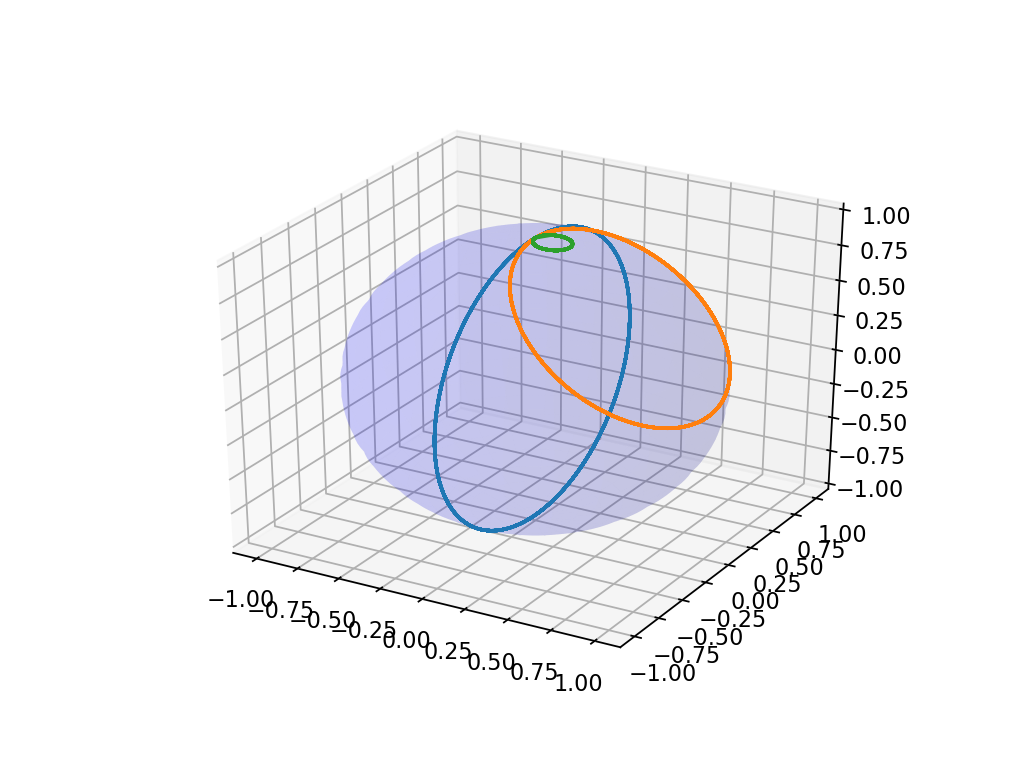

/Applications/anaconda/envs/physics/lib/python3.6/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

a = np.linspace(0, 2 * np.pi, 100)
b = np.linspace(0, np.pi, 100)
x = 1 * np.outer(np.cos(a), np.sin(b))
y = 1 * np.outer(np.sin(a), np.sin(b))
z = 1 * np.outer(np.ones(np.size(a)), np.cos(b))
ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', linewidth=1, alpha=0.1)
    
makeplot(dR, R0, T, ax)
W = np.array([1,0,1],dtype="complex64")
makeplot(dR, R0, T, ax)
W = np.array([1,0,10],dtype="complex64")
makeplot(dR, R0, T, ax)

In [6]:
def dR2(t,R):
    W = np.array([1,0,10*t/(50)-10],dtype="complex64")
    return np.cross(R,W)
def dR3(t,R):
    W = np.array([1,0,10*t/(2.5)-10],dtype="complex64")
    return np.cross(R,W)

<IPython.core.display.Javascript object>


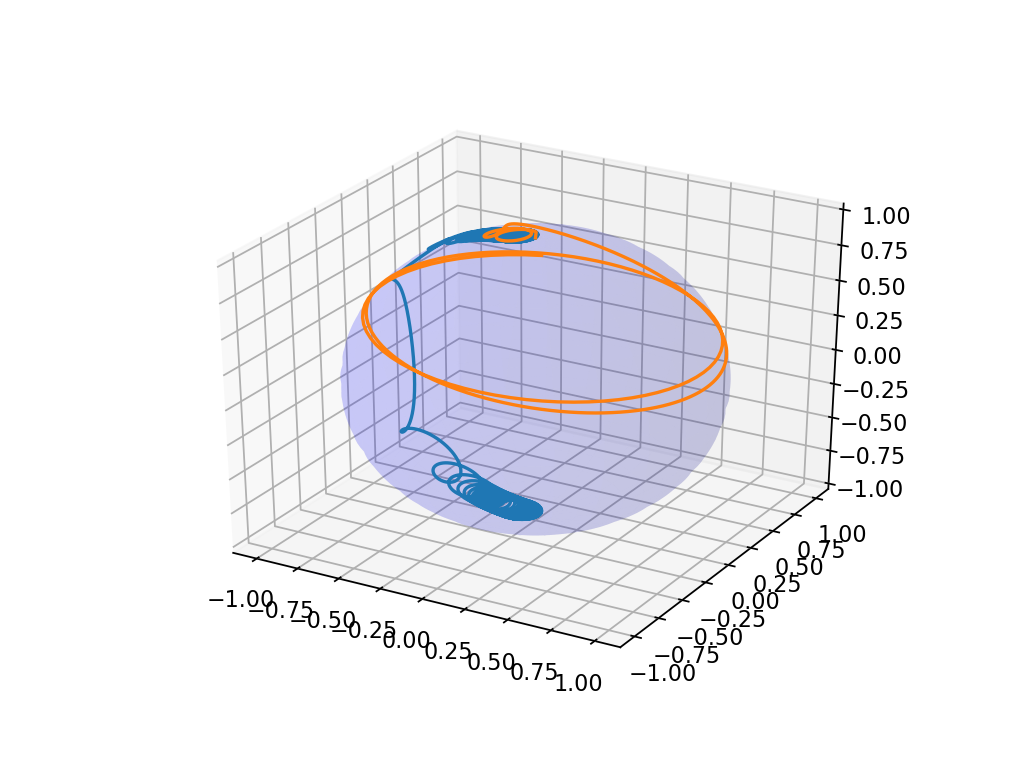

/Applications/anaconda/envs/physics/lib/python3.6/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


In [7]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111, projection='3d')

a = np.linspace(0, 2 * np.pi, 100)
b = np.linspace(0, np.pi, 100)
x = 1 * np.outer(np.cos(a), np.sin(b))
y = 1 * np.outer(np.sin(a), np.sin(b))
z = 1 * np.outer(np.ones(np.size(a)), np.cos(b))
ax2.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', linewidth=1, alpha=0.1)
    
makeplot(dR2, R0, T, ax2)
makeplot(dR3, R0, 50, ax2)

In [8]:
def dR4(t,R):
    W = np.array([1,0,10*t/(2.5)-10],dtype="complex64")-0.1*0.5*R+np.array([1,0,0.5*0.1])
    return np.cross(R,W)

<IPython.core.display.Javascript object>


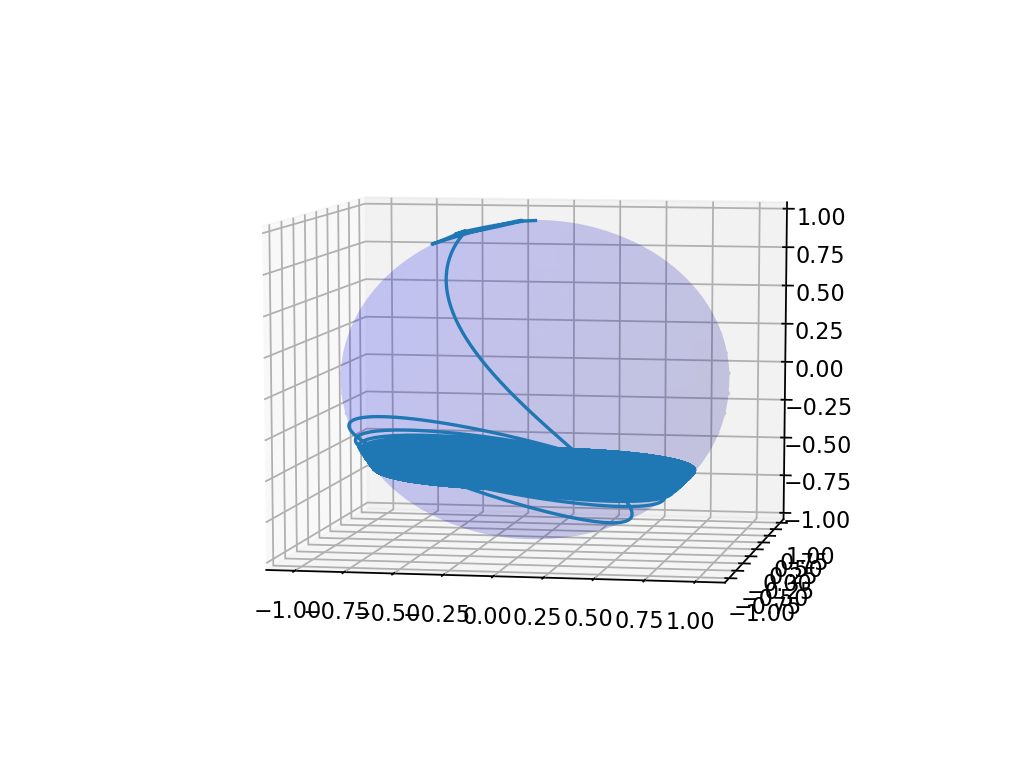

/Applications/anaconda/envs/physics/lib/python3.6/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


In [9]:
fig3 = plt.figure()
ax3 = fig3.add_subplot(111, projection='3d')

a = np.linspace(0, 2 * np.pi, 100)
b = np.linspace(0, np.pi, 100)
x = 1 * np.outer(np.cos(a), np.sin(b))
y = 1 * np.outer(np.sin(a), np.sin(b))
z = 1 * np.outer(np.ones(np.size(a)), np.cos(b))
ax3.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', linewidth=1, alpha=0.1)
    
makeplot(dR4, R0, T, ax3)